<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)][iris['target'] != 0]
y = (iris['target'][iris['target'] != 0] == 2).astype(int)

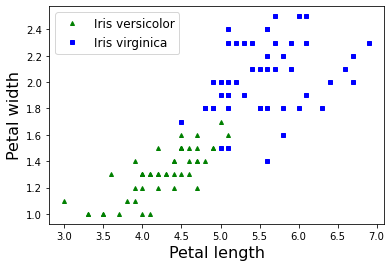

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'g^', label='Iris versicolor', markersize=4)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label='Iris virginica', markersize=4)
plt.xlabel('Petal length', fontsize=16)
plt.ylabel('Petal width', fontsize=16)
plt.legend(fontsize=12)

In [4]:
svm_clf = LinearSVC(loss='hinge', C=1)
scaler = StandardScaler()
svm_pipeline = Pipeline([
    ('scaler', scaler),
    ('linear_svm', svm_clf)
])
svm_pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_pipeline.predict([[5.5, 1.7]])

array([1])

In [6]:
b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
w = svm_clf.coef_[0] / scaler.scale_
svm_clf.intercept_ = np.array([b])
svm_clf.coef_ = np.array([w])

In [7]:
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx1]

In [8]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

In [9]:
x0 = np.linspace(3, 7, 100)
decision_boundary = -w[0] * x0 / w[1] - b/w[1]
margin = 1 / w[1]
upper_boundary = decision_boundary + margin
lower_boundary = decision_boundary - margin

In [10]:
svs = svm_clf.support_vectors_

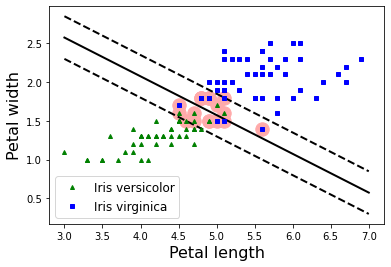

In [11]:
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolor='#FFAAAA')
plt.plot(x0, decision_boundary, 'k-', linewidth=2)
plt.plot(x0, upper_boundary, 'k--', linewidth=2)
plt.plot(x0, lower_boundary, 'k--', linewidth=2)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'g^', label='Iris versicolor', markersize=4)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label='Iris virginica', markersize=4)
plt.xlabel('Petal length', fontsize=16)
plt.ylabel('Petal width', fontsize=16)
plt.legend(fontsize=12)

In [12]:
moons = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)
X = moons[0]
y = moons[1]

(-1.5, 2.5, -1.0, 1.5)

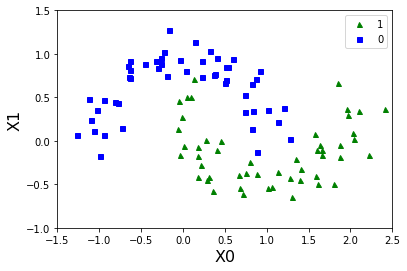

In [13]:
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^', label='1', markersize=5)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='0', markersize=5)
plt.xlabel('X0', fontsize=16)
plt.ylabel('X1', fontsize=16)
plt.legend(fontsize=10)
plt.axis([-1.5, 2.5, -1.0, 1.5])

In [14]:
poly_svm_clf = Pipeline([
    ('poly_feats', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('poly_svm', LinearSVC(loss='hinge', C=10, max_iter=5000))
])
poly_svm_clf.fit(X, y)

Pipeline(steps=[('poly_feats', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('poly_svm', LinearSVC(C=10, loss='hinge', max_iter=5000))])

In [15]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_kernel_svm', SVC(kernel='poly', degree=3, coef0=1, C=10))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_kernel_svm', SVC(C=10, coef0=1, kernel='poly'))])

In [16]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel_svm', SVC(kernel='rbf', gamma=0.1, C=1000))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=1000, gamma=0.1))])

In [17]:
another_rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel_svm', SVC(kernel='rbf', gamma=5, C=1000))
])
another_rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=1000, gamma=5))])

In [18]:
def plot_model(model, x1min, x1max, x2min, x2max):
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^', label='1', markersize=5)
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='0', markersize=5)
    plt.xlabel('X0', fontsize=16)
    plt.ylabel('X1', fontsize=16)
    plt.legend(fontsize=10)
    x0, x1 = np.meshgrid(
        np.linspace(x1min, x1max, 100),
        np.linspace(x2min, x2max, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new).reshape(x0.shape)
    y_decision = model.decision_function(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.axis([x1min, x1max, x2min, x2max])

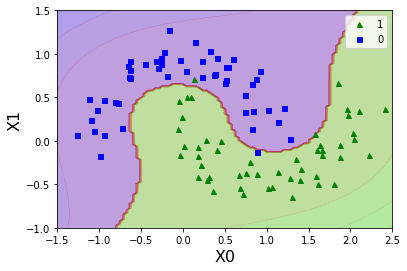

In [19]:
plot_model(poly_svm_clf, -1.5, 2.5, -1, 1.5)

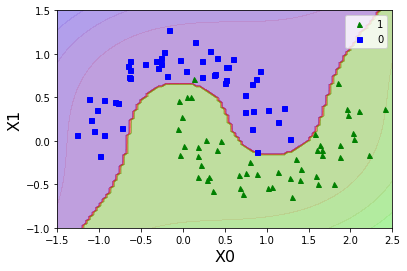

In [20]:
plot_model(poly_kernel_svm_clf, -1.5, 2.5, -1, 1.5)

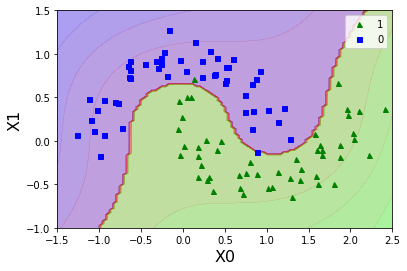

In [21]:
plot_model(rbf_kernel_svm_clf, -1.5, 2.5, -1, 1.5)

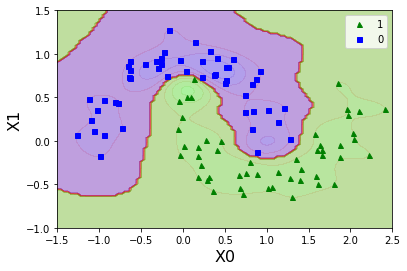

In [22]:
plot_model(another_rbf_kernel_svm_clf, -1.5, 2.5, -1, 1.5)

In [23]:
X = 2 * np.random.rand(50, 1)
y = (4 + 3 * X + np.random.randn(50, 1)).ravel()

In [24]:
svr_reg = LinearSVR(epsilon=1.5)
svr_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [25]:
y_pred = svr_reg.predict(X)
support_idx = np.argwhere((np.abs(y - y_pred) >= svr_reg.epsilon))
svr_reg.support_ = support_idx

Text(0, 0.5, 'y')

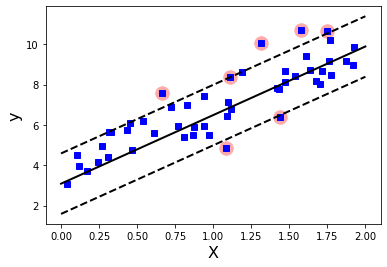

In [26]:
plt.plot(X, y, 'bs')
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_new = svr_reg.predict(X_new)
plt.plot(X_new, y_new, 'k-', linewidth=2)
plt.plot(X_new, y_new + svr_reg.epsilon, 'k--', linewidth=2)
plt.plot(X_new, y_new - svr_reg.epsilon, 'k--', linewidth=2)
plt.scatter(X[svr_reg.support_], y[svr_reg.support_], s=180, facecolor="#FFAAAA")
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)

In [27]:
generator = np.random.rand(50, 2)
X = np.r_[3 + 2 * generator + 0.2 * np.random.randn(50, 2), 1 + 2 * generator + 0.25 * np.random.randn(50, 2)]
y = np.r_[np.zeros((50, 1)), np.ones((50, 1))].ravel()

Text(0, 0.5, 'X2')

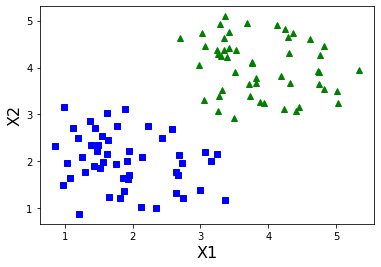

In [28]:
plt.plot(X[:50, 0], X[:50, 1], 'g^', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bs', label='1')
plt.xlabel('X1', fontsize=16)
plt.ylabel('X2', fontsize=16)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
svm_clf = LinearSVC(loss='hinge', C=10)
svm_clf.fit(X_scaled, y)

LinearSVC(C=10, loss='hinge')

In [31]:
linear_kernel_svm_clf = SVC(kernel='linear', C=10)
linear_kernel_svm_clf.fit(X_scaled, y)

SVC(C=10, kernel='linear')

In [32]:
sgd_clf = SGDClassifier(learning_rate="constant", eta0=0.001, alpha=0.1, early_stopping=True, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.1, early_stopping=True, eta0=0.001,
              learning_rate='constant')

In [33]:
def plot_decision_boundary(svm_model, name, scaler, style):
    b = svm_model.decision_function([-scaler.mean_ / scaler.scale_])
    w = svm_model.coef_[0] / scaler.scale_

    X_new = np.linspace(0, 7, 200)
    decion_bounadry = -(w[0] * X_new + b) / w[1]
    plt.plot(X_new, decion_bounadry, style, label=name, linewidth=2)

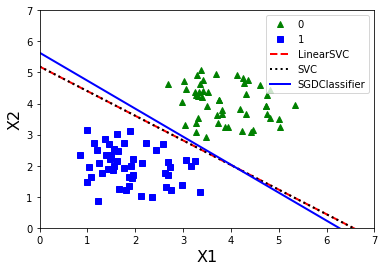

In [34]:
plt.plot(X[:50, 0], X[:50, 1], 'g^', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bs', label='1')
plt.xlabel('X1', fontsize=16)
plt.ylabel('X2', fontsize=16)

plot_decision_boundary(svm_clf, 'LinearSVC', scaler, 'r--')
plot_decision_boundary(linear_kernel_svm_clf, 'SVC', scaler, 'k:')
plot_decision_boundary(sgd_clf, 'SGDClassifier', scaler, 'b-')
plt.axis([0, 7, 0, 7])
plt.legend()